# (µ+ λ)-ES
While the (1+1)-ES had one parent, one child. The (µ+ λ)-ES generalises this: you maintain a population of µ parents, generate  λ offspring, and select the best µ supervisors to become the next generation’s parents. 
* μ (mu) = number of parents kept each generation
* λ (lambda) = number of offspring produced each generation
* + = survivors come from parents and offspring pooled together (elitist)
* , would mean survivors come from offspring only (non-elitist)

=== Why is a population better than a single individual? Because multiple parents cover more of the research space simultaneously, and they can share info through recombination 

## Recombination - the new gradient 
This is what (1+1)-ES couldn’t do. With a population you can combine info from 2 parents to create a child that inherits from both.
1. Intermediate recombination - average the 2 parents:
      child = 0.5 * (parent1 + parent2)
      Child lands geometrically between the 2 parents -> if 2 solutions are both good, the region between them is probably also good 
2. Dominant recombination - for each gene, randomly pick one parent or the other 
      for each dimension i:
             child[i] = parent1[i]  with probability 0.5
             child[i] = parent2[i]  with probability 0.5
    The child is a mosaic. More disruptive than intermediate, it can create combinations that
    neither parent had, which helps exploration but risks breaking good building blocks 
    After recombination, mutation is always applied on top:
    child = recombine(parent1, parent2) + σ · N(0,1)
Recombination sets the direction, mutation adds randomness. 

## Plus vs Comma Selection 
* Plus (μ+λ): pool all μ parents and λ offspring together, pick the best μ. The best parent can never be replaced by a worse offspring. Monotonically non-increasing fitness — you saw this in the verification: zero violations. Safe but can get stuck because good solutions dominate forever.
* Comma (μ,λ): ignore parents entirely, pick the best μ from λ offspring only. The best solution can get worse from one generation to the next. Risky, but this is actually a feature — it allows the population to escape local optima because the old elites don't block exploration. This is why comma requires λ > μ strictly: you need enough offspring to reliably produce good survivors without the parent safety net.

### Conceptual Questions 
- What are the advtnages of populations?
- what is a (µ+ λ)-ES?
- Why is recombination used in ES and what types exist? 
- Compare plus and comma selection

### Manual Simulation Questions 
- Simulate 2 generations of a (3 + 5)-ES on the Sphere function with n= 2.
- Use intermediate recombination and track parents, intermediate solutions, and offspring,.

In [ ]:
pip install cma -q

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cma

# ----- Benchmark functions -----

def sphere(x):
    return np.sum(x**2)

def rastrigin(x):
    x = np.array(x)
    return 10*len(x) + np.sum(x**2 - 10*np.cos(2*np.pi*x))

In [ ]:
def one_plus_one_es_classic(fitness_function, N=10, sigma=0.5, max_generations=1000):
    x = np.random.uniform(-5, 5, N)
    history = []

    for _ in range(max_generations):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        print(fitness_function(x))
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
        history.append(fitness_function(x))
        sigma*=0.99

    return x, history


for f in [sphere]:
    x_best, history = one_plus_one_es_classic(f)
    print(f.__name__, "Best fitness:", history[-1])

76.980597301175
76.980597301175
76.980597301175
76.980597301175
76.980597301175
76.980597301175
70.66498150278615
70.66498150278615
70.66498150278615
70.66498150278615
60.689063619513355
54.76924834662988
54.76924834662988
52.180660090348624
43.48693977868113
43.48693977868113
43.48693977868113
43.48693977868113
31.482234176601686
31.482234176601686
30.973309982525898
30.973309982525898
30.973309982525898
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.848787858357806
28.143828364967334
28.143828364967334
28.143828364967334
28.143828364967334
22.200883271451644
21.581089924204296
21.581089924204296
21.581089924204296
21.581089924204296
21.581089924204296
21.581089924204296
21.513576357362695
21.361079173049692
21.361079173049692
21.361079173049692
21.361079173049692
21.361079173049692
20.57262946524861
18.84847836124369
18.84847836124369
18.84847836124369
18.84847836124369
14.9855

In [ ]:
def one_plus_one_es_classic(fitness_function, N=10, sigma=0.5, max_generations=1000):
    x = np.random.uniform(-5, 5, N)
    history = []

    for _ in range(max_generations):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        print(fitness_function(x))
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
        history.append(fitness_function(x))
        sigma*=0.99

    return x, history


for f in [sphere]:
    x_best, history = one_plus_one_es_classic(f)
    print(f.__name__, "Best fitness:", history[-1])

70.5161068949449
70.5161068949449
70.5161068949449
70.5161068949449
70.5161068949449
70.5161068949449
70.5161068949449
62.65434092304346
54.29772642299652
53.993106455916475
53.993106455916475
52.83601184732674
50.30640610555063
50.30640610555063
50.30640610555063
50.30640610555063
50.30640610555063
49.96856283104392
48.323567030432656
43.70758084085153
43.70758084085153
42.071309115301865
42.071309115301865
42.071309115301865
41.585971365692835
36.34331096199187
36.34331096199187
36.34331096199187
36.34331096199187
33.11601387761291
33.11601387761291
33.11601387761291
32.88928460291446
31.31216691966948
29.685262440363644
29.685262440363644
24.013493915594587
24.013493915594587
24.013493915594587
24.013493915594587
24.013493915594587
24.013493915594587
22.71466746657346
22.176773795787415
22.176773795787415
20.551179952634225
20.551179952634225
20.551179952634225
18.41770157267853
18.41770157267853
18.41770157267853
18.41770157267853
14.844689667871778
13.1112051295228
13.111205129522

In [ ]:
def one_plus_one_es_success_rule(fitness_function, N=10, sigma=0.5, max_generations=2000):
    x = np.random.uniform(-5, 5, N)
    tau = 1.5
    k = 20
    success_count = 0
    history = []

    for t in range(1, max_generations + 1):
        x_prime = x + sigma * np.random.normal(0, 1, N)
        if fitness_function(x_prime) <= fitness_function(x):
            x = x_prime
            success_count += 1

        if t % k == 0:
            success_rate = success_count / k
            if success_rate > 1/5:
                sigma *= tau
            else:
                sigma /= tau
            success_count = 0

        history.append(fitness_function(x))

    return x, history


for f in [sphere, rastrigin]:
    x_best, history = one_plus_one_es_success_rule(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 4.337262368201274e-23
rastrigin Best fitness: 99.4952423241669


In [ ]:
def mu_plus_lambda_es(fitness_fn, dim=10, mu=5, lmbda=20, generations=200, sigma=0.3):
    population = np.random.randn(mu, dim)
    history = []

    for _ in range(generations):
        offspring = []
        for _ in range(lmbda):
            parent = population[np.random.randint(mu)]
            child = parent + sigma * np.random.randn(dim)
            offspring.append(child)

        combined = np.vstack([population, offspring])
        fitness = np.array([fitness_fn(ind) for ind in combined])
        best_indices = np.argsort(fitness)[:mu]
        population = combined[best_indices]
        history.append(fitness[best_indices[0]])

    return population[0], history


for f in [sphere, rastrigin]:
    best, history = mu_plus_lambda_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 0.060370181707117984
rastrigin Best fitness: 26.213334459652998


In [ ]:
def self_adaptive_es(fitness_fn, dim=10, mu=5, lmbda=20, generations=200):
    tau = 1 / np.sqrt(dim)
    population = [(np.random.randn(dim), 0.5) for _ in range(mu)]
    history = []

    for _ in range(generations):
        offspring = []
        for _ in range(lmbda):
            x, sigma = population[np.random.randint(mu)]
            sigma_prime = sigma * np.exp(tau * np.random.randn())
            sigma_prime = max(sigma_prime, 1e-8)
            x_prime = x + sigma_prime * np.random.randn(dim)
            offspring.append((x_prime, sigma_prime))

        combined = population + offspring
        fitness = [fitness_fn(ind[0]) for ind in combined]
        best_indices = np.argsort(fitness)[:mu]
        population = [combined[i] for i in best_indices]
        history.append(fitness[best_indices[0]])

    return population[0], history


for f in [sphere, rastrigin]:
    best, history = self_adaptive_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 7.737667126483565e-16
rastrigin Best fitness: 11.939498609481504


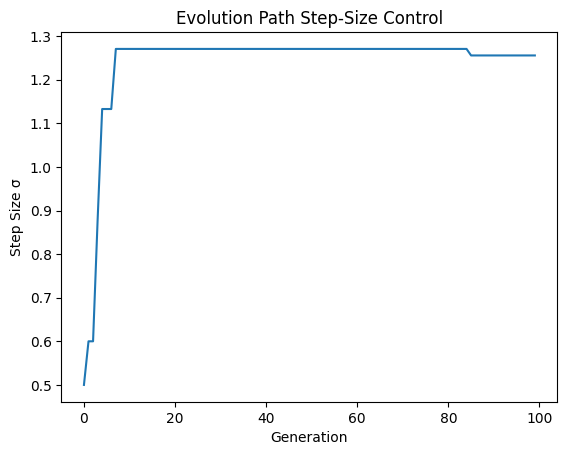

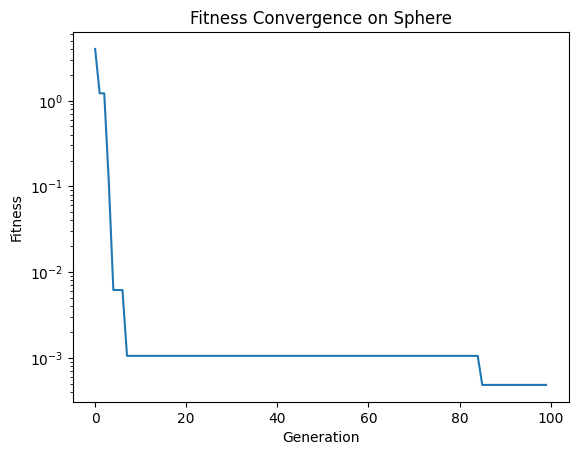

In [ ]:
def evolution_path_es(generations=100):
    x = 2.0
    sigma = 0.5
    p_sigma = 0.0
    c_sigma = 0.3
    d_sigma = 1.0
    expected_norm = np.sqrt(2/np.pi)

    sigma_vals = []
    fitness_vals = []

    for _ in range(generations):
        z = np.random.randn()
        x_candidate = x + sigma * z

        # Elitist selection
        if sphere(x_candidate) < sphere(x):
            x = x_candidate
            p_sigma = (1 - c_sigma) * p_sigma + np.sqrt(c_sigma*(2-c_sigma)) * z
            sigma *= np.exp((c_sigma/d_sigma) * (abs(p_sigma)/expected_norm - 1))

        sigma_vals.append(sigma)
        fitness_vals.append(sphere(x))

    return sigma_vals, fitness_vals

sigma_vals, fitness_vals = evolution_path_es()

# Plot step size
plt.figure()
plt.plot(sigma_vals)
plt.xlabel("Generation")
plt.ylabel("Step Size σ")
plt.title("Evolution Path Step-Size Control")
plt.show()

# Plot fitness (log scale)
plt.figure()
plt.plot(fitness_vals)
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.yscale("log")
plt.title("Fitness Convergence on Sphere")
plt.show()

In [ ]:
def simple_cma_es(fitness_fn, N=10, sigma=0.5, lambda_=10, mu=5, generations=200):
    x = np.random.randn(N)
    C = np.eye(N)
    history = []

    for _ in range(generations):
        A = np.linalg.cholesky(C)
        Z = np.random.randn(lambda_, N)
        X = x + sigma * Z @ A.T
        fitnesses = np.array([fitness_fn(xi) for xi in X])
        indices = np.argsort(fitnesses)
        selected = X[indices[:mu]]
        x_mean = np.mean(selected, axis=0)

        C_update = np.zeros((N,N))
        for xi in selected:
            diff = xi - x_mean
            C_update += np.outer(diff, diff)
        C = 0.8*C + 0.2*(C_update/mu)

        if fitness_fn(x_mean) <= fitness_fn(x):
            x = x_mean

        history.append(fitness_fn(x))

    return x, history


for f in [sphere, rastrigin]:
    best, history = simple_cma_es(f)
    print(f.__name__, "Best fitness:", history[-1])

sphere Best fitness: 0.27388501139086535
rastrigin Best fitness: 13.92941672366797


In [ ]:
def run_pycma(fitness_fn):
    N = 10
    initial_mean = np.random.randn(N)
    initial_sigma = 0.5

    es = cma.CMAEvolutionStrategy(initial_mean, initial_sigma)
    es.optimize(fitness_fn, maxfun=10000)
    print("Best fitness:", es.result.fbest)

print("Sphere:")
run_pycma(sphere)

print("\nRastrigin:")
run_pycma(rastrigin)

Sphere:
(5_w,10)-aCMA-ES (mu_w=3.2,w_1=45%) in dimension 10 (seed=300146, Fri Feb 27 12:00:50 2026)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     10 6.946776750654564e+00 1.0e+00 4.51e-01  4e-01  5e-01 0:00.0
    2     20 6.090649199770244e+00 1.1e+00 4.24e-01  4e-01  4e-01 0:00.0
    3     30 5.543284715738253e+00 1.2e+00 4.39e-01  4e-01  5e-01 0:00.0
  100   1000 1.824819926159974e-07 1.8e+00 4.77e-04  2e-04  2e-04 0:00.0
  200   2000 5.612586023177127e-14 2.0e+00 6.05e-07  9e-08  1e-07 0:00.1
  207   2070 2.141571041863470e-14 1.9e+00 3.68e-07  5e-08  7e-08 0:00.1
termination on {'tolfun': 1e-11}
final/bestever f-value = 2.141571e-14 2.141571e-14 after 2070/2062 evaluations
incumbent solution: [-3.78610905e-08 -3.44394110e-08  5.22209056e-08 -3.54770500e-08
 -3.49034075e-08 -1.48085882e-08  3.25418367e-08 -1.57341615e-09 ...]
std deviations: [5.26272176e-08 5.94829465e-08 6.56562212e-08 6.22248272e-08
 5.82905535e-08 5.55331723e-08 5.13654685e-08 

# EXERCISES 3 (a)(b)(c)

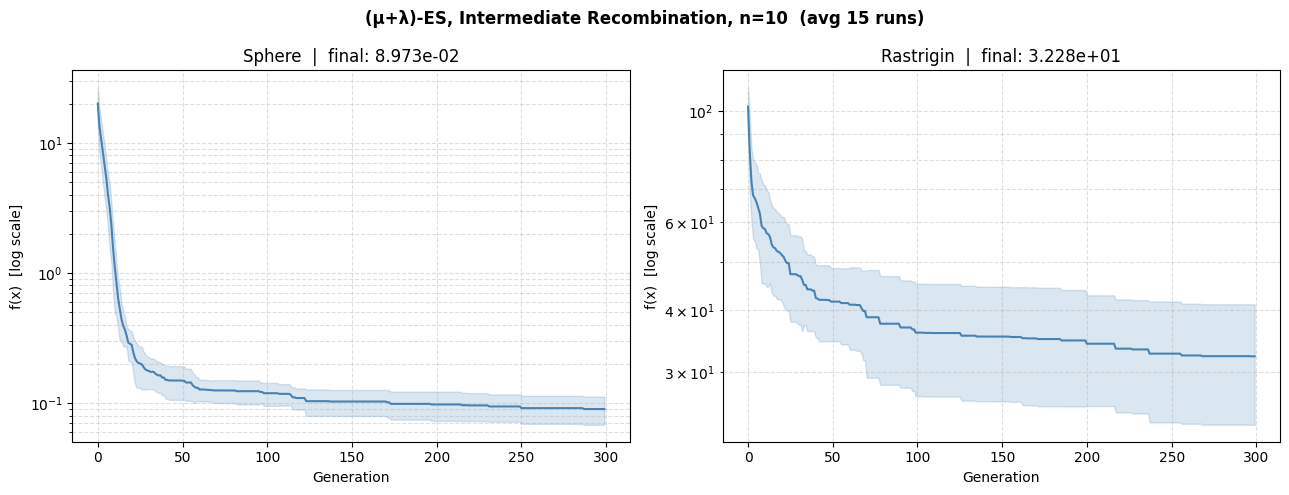

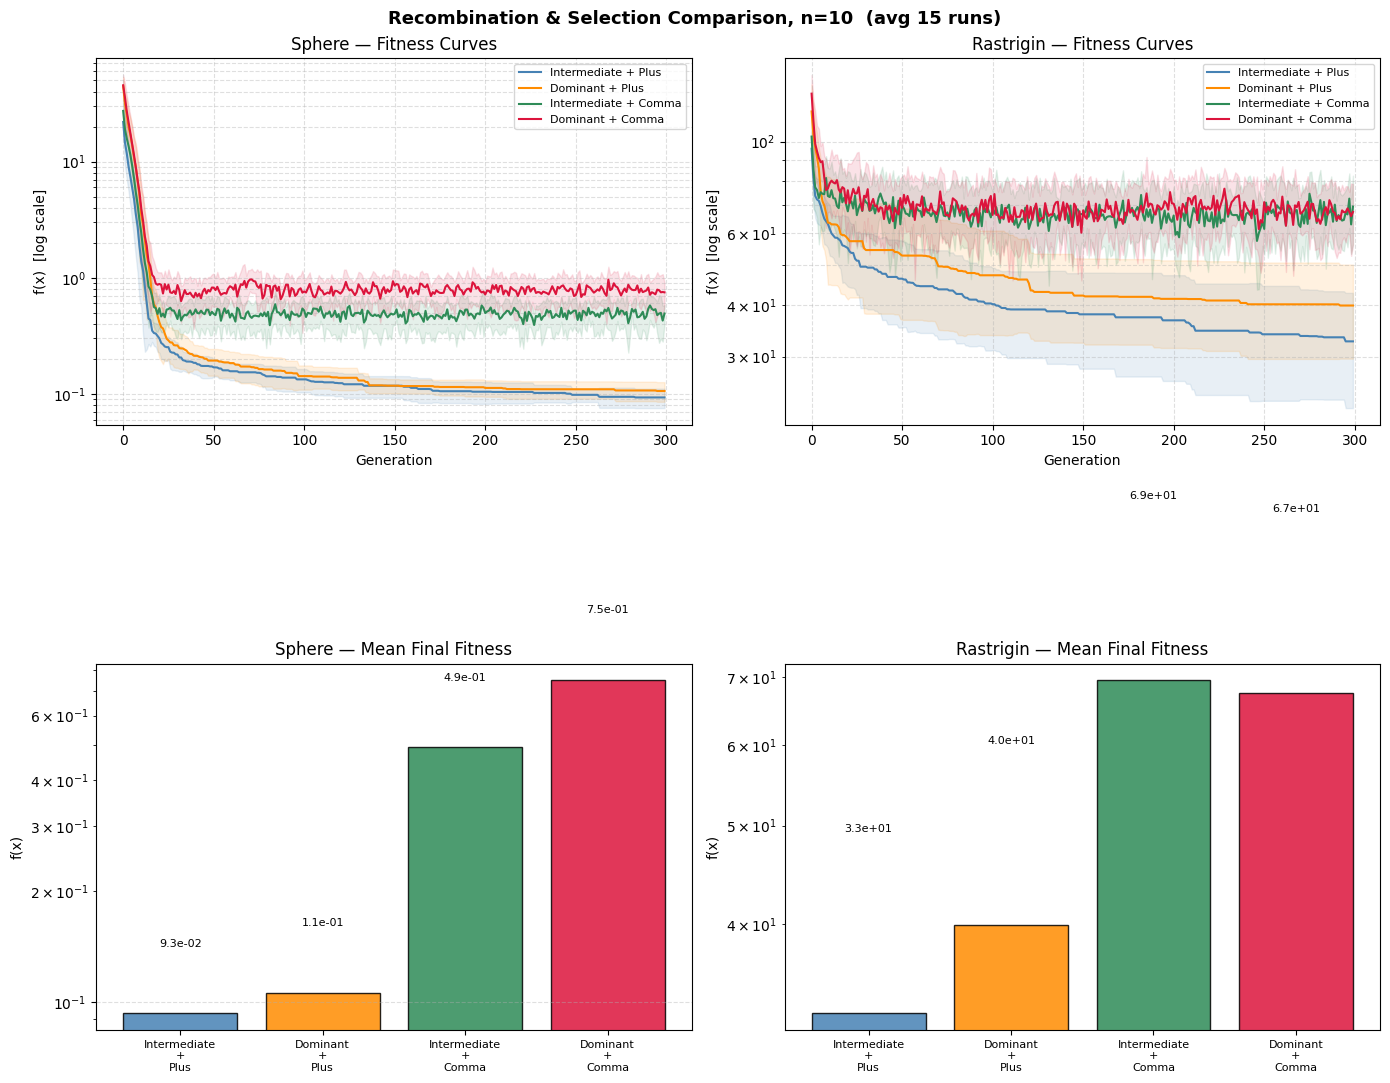


Configuration                              Sphere            Rastrigin
Intermediate + Plus                  9.311096e-02         3.266985e+01
Dominant + Plus                      1.057741e-01         3.992978e+01
Intermediate + Comma                 4.917001e-01         6.946730e+01
Dominant + Comma                     7.482156e-01         6.742263e+01


In [ ]:
import numpy as np
import matplotlib.pyplot as plt 

def sphere(x):
    return np.sum(x**2)
def rastrigin(x):
    x = np.array(x)
    return 10 * len(x) + np.sum(x**2 - 10 * np.cos(2 * np.pi * x))

BENCHMARKS = {"Sphere": sphere, "Rastrigin": rastrigin}

# (a) recombination
def recombine(parents, mode="intermediate"):
    # pick 2 parents at random from population 
    p1, p2 = parents[np.random.randint(len(parents))], \
              parents[np.random.randint(len(parents))]

    if mode == "intermediate":
        return 0.5 * (p1 + p2)  # mean of both
    elif mode == "dominant":
        mask = np.random.rand(len(p1)) < 0.5  # gene-wise coin flip
        return np.where(mask, p1, p2)

def mu_plus_lambda_es(fitness_fn, dim=10, mu=5, lmbda=20,
                      generations=300, sigma=0.3,
                      recombination="intermediate",
                      selection="plus"):
    if selection == "comma" and lmbda < mu:
        raise ValueError(f"Comma selection requires lmbda ({lmbda}) >= mu ({mu})")
    population = np.random.uniform(-5, 5, (mu, dim))
    history    = []

    for _ in range(generations):
        offspring = np.array([
            recombine(population, mode=recombination) + sigma * np.random.randn(dim)
            for _ in range(lmbda)
        ])

        if selection == "plus":
            pool = np.vstack([population, offspring])   
        else:  # comma
            pool = offspring                             

        fitnesses    = np.array([fitness_fn(ind) for ind in pool])
        best_indices = np.argsort(fitnesses)[:mu]
        population   = pool[best_indices]
        history.append(fitnesses[best_indices[0]])

    return population[0], history

# (b) Run (μ+λ)-ES on benchm
N_RUNS = 15
GENS   = 300
DIM    = 10

def avg_runs(fitness_fn, **kwargs):
    all_h = []
    for _ in range(N_RUNS):
        _, h = mu_plus_lambda_es(fitness_fn, dim=DIM, generations=GENS, **kwargs)
        all_h.append(h)
    arr = np.array(all_h)
    return arr.mean(axis=0), arr.std(axis=0)
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
fig.suptitle(f"(μ+λ)-ES, Intermediate Recombination, n={DIM}  (avg {N_RUNS} runs)",
             fontsize=12, fontweight="bold")
for ax, (name, fn) in zip(axes, BENCHMARKS.items()):
    mean, std = avg_runs(fn, sigma=0.3, recombination="intermediate", selection="plus")
    gens = np.arange(GENS)
    ax.semilogy(gens, mean, color="steelblue")
    ax.fill_between(gens,
                    np.maximum(mean - std, 1e-30),
                    mean + std,
                    alpha=0.2, color="steelblue")
    ax.set_title(f"{name}  |  final: {mean[-1]:.3e}")
    ax.set_xlabel("Generation"); ax.set_ylabel("f(x)  [log scale]")
    ax.grid(True, which="both", linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()
plt.close()

# (c)
CONFIGS = {
    "Intermediate + Plus":    dict(recombination="intermediate", selection="plus"),
    "Dominant + Plus":        dict(recombination="dominant",     selection="plus"),
    "Intermediate + Comma":   dict(recombination="intermediate", selection="comma"),
    "Dominant + Comma":       dict(recombination="dominant",     selection="comma"),
}
config_colors = {
    "Intermediate + Plus":  "steelblue",
    "Dominant + Plus":      "darkorange",
    "Intermediate + Comma": "seagreen",
    "Dominant + Comma":     "crimson",
}

fig, axes = plt.subplots(2, 2, figsize=(14, 11))
fig.suptitle(f"Recombination & Selection Comparison, n={DIM}  (avg {N_RUNS} runs)",
             fontsize=13, fontweight="bold")

summary = {}   

for col, (name, fn) in enumerate(BENCHMARKS.items()):
    results = {}
    for label, cfg in CONFIGS.items():
        mean, std = avg_runs(fn, sigma=0.3, **cfg)
        results[label] = (mean, std)
        summary[(name, label)] = mean[-1]
    ax = axes[0, col]
    gens = np.arange(GENS)
    for label, (mean, std) in results.items():
        ax.semilogy(gens, mean, label=label, color=config_colors[label])
        ax.fill_between(gens,
                        np.maximum(mean - std, 1e-30),
                        mean + std,
                        alpha=0.12, color=config_colors[label])
    ax.set_title(f"{name} — Fitness Curves")
    ax.set_xlabel("Generation"); ax.set_ylabel("f(x)  [log scale]")
    ax.legend(fontsize=8); ax.grid(True, which="both", linestyle="--", alpha=0.4)

    ax = axes[1, col]
    labels     = list(CONFIGS.keys())
    finals     = [summary[(name, l)] for l in labels]
    bar_colors = [config_colors[l] for l in labels]
    bars = ax.bar(range(len(labels)), finals, color=bar_colors,
                  edgecolor="black", alpha=0.85)
    ax.set_xticks(range(len(labels)))
    ax.set_xticklabels([l.replace(" + ", "\n+\n") for l in labels], fontsize=8)
    ax.set_title(f"{name} — Mean Final Fitness")
    ax.set_ylabel("f(x)"); ax.set_yscale("log")
    for bar, val in zip(bars, finals):
        ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() * 1.5,
                f"{val:.1e}", ha="center", va="bottom", fontsize=8)
    ax.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()
plt.close()

print("\n" + "=" * 75)
print(f"{'Configuration':<28} {'Sphere':>20} {'Rastrigin':>20}")
print("=" * 75)
for label in CONFIGS:
    s = summary[("Sphere",    label)]
    r = summary[("Rastrigin", label)]
    print(f"{label:<28} {s:>20.6e} {r:>20.6e}")
print("=" * 75)